<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/start_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
start_up = pd.read_csv("50_Startups.csv")

In [ ]:
start_up.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
start_up.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
X_features = ['R&D Spend','Administration','Marketing Spend','State']

In [ ]:
start_up_encoded = pd.get_dummies(start_up[X_features],columns=['State'],dtype = 'int', drop_first = True)

In [ ]:
start_up_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

In [ ]:
X_features = start_up_encoded.columns

In [ ]:
from sklearn.model_selection import train_test_split

X = sm.add_constant(start_up_encoded)
y = start_up['Profit']

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
start_up_model_1 = sm.OLS(train_y, train_X).fit()
start_up_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.947     
Dependent Variable:   Profit             AIC:                  853.2663  
Date:                 2025-04-27 10:18   BIC:                  863.3996  
No. Observations:     40                 Log-Likelihood:       -420.63   
Df Model:             5                  F-statistic:          140.1     
Df Residuals:         34                 Prob (F-statistic):   1.13e-21  
R-squared:            0.954              Scale:                9.3765e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           54028.0396 8457.2933  6.3883 0.0000 36840.7518 71215.3274
R&D Spend           0.8056    0.0524 15.3831 0.0000     0.6992     0.9121
Administration     -0.0688    0.0607 -1.1325 0.2653    -0.1922     0.0546
Marketing Spend     0.0299    0.0222  1.3462 0.1871    -0.0152     0.0749
State_Florida     938.7930 3893.5109  0.2411 0.8109 -6973.7731  8851.3591
State_New York      6.9878 3882.7649  0.0018 0.9986 -7883.7398  7897.7154
-------------------------------------------------------------------------
Omnibus:                 15.391         Durbin-Watson:            1.751  
Prob(Omnibus):           0.000          Jarque-Bera (JB):         20.231 
Skew:                    -1.142         Prob(JB):                 0.000  
Kurtosis:                5.631          Condition No.:            1644518
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

<Figure size 1000x600 with 0 Axes>

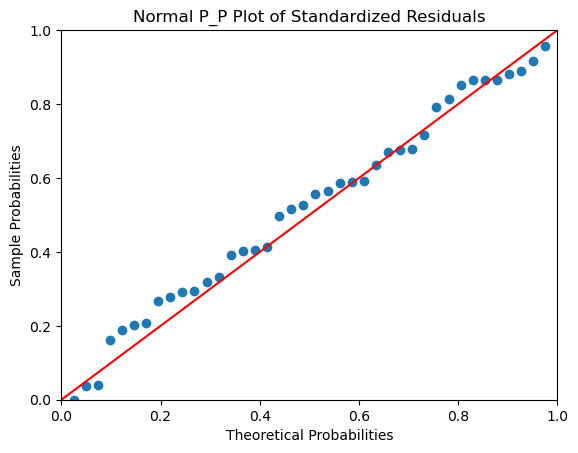

In [ ]:
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
residuals_scaled = scaler.fit_transform(start_up_model_1.resid.values.reshape(-1, 1)).flatten()

probplot = sm.ProbPlot(residuals_scaled, dist=norm)
plt.figure(figsize=(10, 6))
probplot.ppplot(line='45')
plt.title('Normal P_P Plot of Standardized Residuals')
plt.show()

In [ ]:
pred_y = start_up_model_1.predict(test_X[train_X.columns])

In [ ]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

9055.957323204319

In [ ]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.89

In [ ]:
def predict_profit(rnd, admin, marketing, state):
    # Prepare a dictionary with all required columns
    input_dict = {
        'R&D Spend': rnd,
        'Administration': admin,
        'Marketing Spend': marketing,
        'State_Florida': 0,
        'State_New York': 0
    }

    # Handle state input
    if state.lower() == 'florida':
        input_dict['State_Florida'] = 1
    elif state.lower() == 'new york':
        input_dict['State_New York'] = 1
    # If California, leave both dummies as 0

    # Create DataFrame
    input_df = pd.DataFrame([input_dict])

    # Add constant manually (must match model)
    input_df = sm.add_constant(input_df, has_constant='add')

    # Ensure column order matches training
    input_df = input_df[start_up_model_1.model.exog_names]

    # Predict
    predicted_profit = start_up_model_1.predict(input_df)[0]
    return predicted_profit

# Take inputs from user
rnd_input = float(input("Enter R&D Expenditure: "))
admin_input = float(input("Enter Administrative Expenditure: "))
marketing_input = float(input("Enter Marketing Expenditure: "))
state_input = input("Enter State of Origin (California / Florida / New York): ")

# Predict and print the result
predicted_profit = predict_profit(rnd_input, admin_input, marketing_input, state_input)
print(f"Predicted Profit: ${predicted_profit:.2f}")


Enter R&D Expenditure:  152458
Enter Administrative Expenditure:  124586
Enter Marketing Expenditure:  45989
Enter State of Origin (California / Florida / New York):  New York


Predicted Profit: $169662.79
